In [3]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting()

# Old Calcs - Lagrangian  Calcs V2


In [4]:
x, y = dynamicsymbols("x y")
t = symbols("t")
dx = x.diff(t)
dy = y.diff(t)

m, M, g, r, rh, Ib, Ih = symbols("m M g r r_h I_b I_h")

phi = (x - y) / r
dphi = phi.diff(t)


qlist = [x, y]
qmat = Matrix([[x] for x in qlist])
dqmat = qmat.diff(t)

In [5]:
Tb = (M + Ib/r**2)/2 * dx**2

vh_x = dx + cos(phi) * rh*dphi
vh_y = -sin(phi) * rh*dphi
vsq = (vh_x**2 + vh_y**2).expand().trigsimp().simplify()

Th = m/2 * (vsq) + Ih/2 * dphi**2
Th.simplify().trigsimp()

Vh =  m*g*cos(phi)

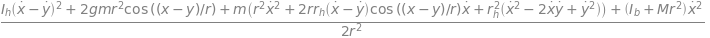

In [6]:
L = Tb + Th + Vh
L.simplify()

In [7]:
L = L.subs([(cos(phi), 1), (sin(phi), phi)]).simplify()

In [8]:
Lag_LHS = L.diff(dqmat).diff(t) - L.diff(qmat)
Lag_LHS

⎡                   ⎛   2                                   2            ⎞     ⎛         2⎞  ⎤
⎢Iₕ⋅(2⋅ẍ - 2⋅ÿ) + m⋅⎝2⋅r ⋅ẍ + 2⋅r⋅rₕ⋅(ẍ - ÿ) + 2⋅r⋅rₕ⋅ẍ + rₕ ⋅(2⋅ẍ - 2⋅ÿ)⎠ + 2⋅⎝I_b + M⋅r ⎠⋅ẍ⎥
⎢────────────────────────────────────────────────────────────────────────────────────────────⎥
⎢                                               2                                            ⎥
⎢                                            2⋅r                                             ⎥
⎢                                                                                            ⎥
⎢                                         ⎛              2             ⎞                     ⎥
⎢                     Iₕ⋅(-2⋅ẍ + 2⋅ÿ) + m⋅⎝-2⋅r⋅rₕ⋅ẍ + rₕ ⋅(-2⋅ẍ + 2⋅ÿ)⎠                     ⎥
⎢                     ──────────────────────────────────────────────────                     ⎥
⎢                                               2                                            ⎥
⎣                                   

In [9]:
ddx = dx.diff(t)
ddy = dy.diff(t)

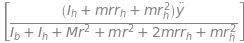

In [10]:
solve(Lag_LHS[0], (dx.diff(t)))

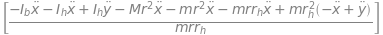

In [12]:
solve(Lag_LHS[0], ddx-ddy)

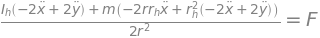

In [13]:
F = symbols("F")
LagEqX = Eq(Lag_LHS[0], 0)
LagEqY = Eq(Lag_LHS[1], F)
LagEqY

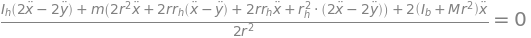

In [14]:
LagEqX

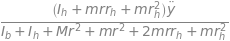

In [15]:
ddx_xpr = solve(LagEqX, ddx)[0]
ddx_xpr

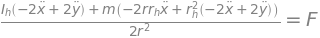

In [16]:
LagEqY

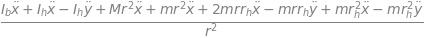

In [17]:
Lag_LHS[0].factor()

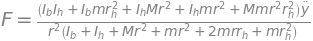

In [18]:
LagEqY_2 = LagEqY.subs(ddx, ddx_xpr).simplify()
LagEqY_2

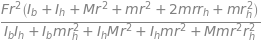

In [19]:
ddy_xpr = solve(LagEqY_2, ddy)[0].simplify()
ddy_xpr

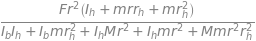

In [20]:
ddx_xpr2 = ddx_xpr.subs(ddy, ddy_xpr)
ddx_xpr2

# OLD CALCS - V1

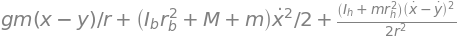

In [27]:
rb = symbols("r_b")
V = -m*g*phi
T = (((m+M) + Ib*rb**2) * dx**2 + (Ih + m*rh**2) * dphi**2) / 2

L = T - V
L

In [28]:
L.diff(qmat.diff(t)).diff(t) - L.diff(qmat)

⎡                               ⎛         2⎞            ⎤
⎢  g⋅m   ⎛       2        ⎞     ⎝Iₕ + m⋅rₕ ⎠⋅(2⋅ẍ - 2⋅ÿ)⎥
⎢- ─── + ⎝I_b⋅r_b  + M + m⎠⋅ẍ + ────────────────────────⎥
⎢   r                                        2          ⎥
⎢                                         2⋅r           ⎥
⎢                                                       ⎥
⎢                  ⎛         2⎞                         ⎥
⎢            g⋅m   ⎝Iₕ + m⋅rₕ ⎠⋅(-2⋅ẍ + 2⋅ÿ)            ⎥
⎢            ─── + ─────────────────────────            ⎥
⎢             r                  2                      ⎥
⎣                             2⋅r                       ⎦

In [29]:
L.diff(qmat.diff(t))

⎡                       ⎛         2⎞            ⎤
⎢⎛       2        ⎞     ⎝Iₕ + m⋅rₕ ⎠⋅(2⋅ẋ - 2⋅ẏ)⎥
⎢⎝I_b⋅r_b  + M + m⎠⋅ẋ + ────────────────────────⎥
⎢                                    2          ⎥
⎢                                 2⋅r           ⎥
⎢                                               ⎥
⎢           ⎛         2⎞                        ⎥
⎢           ⎝Iₕ + m⋅rₕ ⎠⋅(-2⋅ẋ + 2⋅ẏ)           ⎥
⎢           ─────────────────────────           ⎥
⎢                         2                     ⎥
⎣                      2⋅r                      ⎦